# 05: Predicting from Data: Logistic regression

# Outline of ECE 3

- 01: Welcome to Python
- 02: Computing with Data in Python
- 03: Summarizing Data in Python
- **04: Predicting from Data with Machine Learning in Python**
  - A. Clustering
  - B. Linear regression
  - **C. Classification** (not Principal Component Analysis)

## 🦃 Thanksgiving 🦃
- No lecture on Wednesday 11/22
- No labs or TA OH this week 
- HW 7 is due the **next** Thursday 11/30

- **04: Predicting from Data with Machine Learning in Python**
  - **C. Classification **
    - Logistic regression
    - Multinomial logistic regression
    - Neural networks

Quick refresh on where we are in unit 4:

### Unsupervised Learning in ML

$\color{#EF5645}{\text{Definition}}$: _Unsupervised learning_ refers to the task of discovering any naturally occuring patterns in a dataset of data points $x$. We say that the method is:
- a _clustering_: if we want to find groups (clusters), (e.g. find the different diseases that exist within one dataset of brain images),
- a _dimension reduction_: if we want to find the main sources of data variations (e.g., what are the main variations in the shape of a brain?)

### Supervised Learning in ML


$\color{#EF5645}{\text{Definition}}$: _Supervised learning_ refers to the task of learning a function that maps an input $X$ to an output $Y$ based on examples of input-outputs. The method is:
- a _classification_ if outputs are categorical, (e.g., predict if a patient has Alzheimer's from its MRI)
- a _regression_ if quantitative (e.g., predict the age of a patient from its MRI).

<center><img src="figs/03_sl2.png" width=900px alt="default"/></center>
<center>Supervised Learning</center>

Let's consider an example:

*A group of 20 law students spend between 0 and 6 hours studying for their bar exam. How does the number of hours spent studying affect the probability of the student passing the bar exam?*

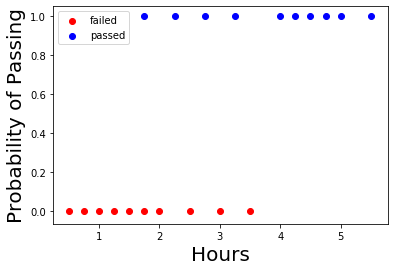

In [27]:
import numpy as np
import matplotlib.pyplot as plt

hours = np.array([0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50])
score = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

failed = score == 0
passed = score == 1

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")
plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

We could try performing linear regression to regress ```hours``` onto ```passed```?

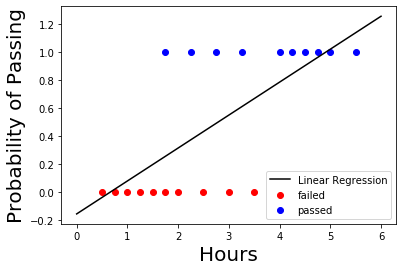

In [28]:
from scipy import stats

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")

fit = stats.linregress(hours, score)
intercept = fit.intercept
slope = fit.slope

xx = np.linspace(0, 6, 100)
yy = slope * xx + intercept
plt.plot(xx, yy, color='black', label="Linear Regression")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

There is an issue with this model it predicts that the probability of passing could be less than zero or greater than one, which is not possible.  How can we fix this?

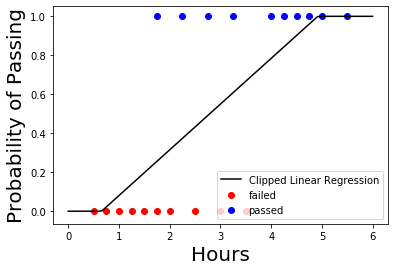

In [29]:
plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")


xx = np.linspace(0, 6, 100)
yy = np.clip(slope * xx + intercept, 0, 1)
plt.plot(xx, yy, color='black', label="Clipped Linear Regression")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

Still, this doesn't seem quite right. The probability of passing should not be such a sharp transition from failling to passing. It would be better to have a function that is more smooth.

In [49]:
def sigmoid(z):
    return np.exp(z) / (np.exp(z) + 1)

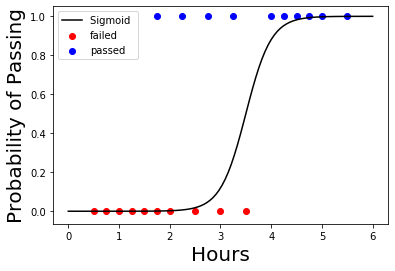

In [50]:
plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")


xx = np.linspace(0, 6, 100)
slope = 4
intercept = -14
yy = sigmoid(slope * xx + intercept)
plt.plot(xx, yy, color='black', label="Sigmoid ")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

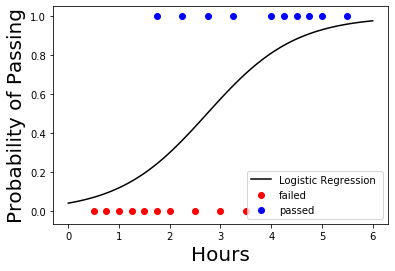

In [57]:
from sklearn.linear_model import LogisticRegression

plt.scatter(hours[failed], score[failed], c='red', label="failed")
plt.scatter(hours[passed], score[passed], c='blue', label="passed")

clf = LogisticRegression(random_state=0).fit(hours[:,None], score)

xx = np.linspace(0, 6, 100)
yy = clf.predict_proba(xx[:,None])[:,1]

plt.plot(xx, yy, color='black', label="Logistic Regression ")

plt.xlabel("Hours", fontsize=20)
plt.ylabel("Probability of Passing", fontsize=20)
plt.legend()

Def Sigmoid

Def Logistic Model

Decision Boundary

How should we fit a Logistic model?

Cross-Entropy Loss

Gradient Descent

Softmax Function

Multiclass Logistic Regression